In [1]:
# import modules
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.style.use('ggplot')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# generate synthetic data for linear regression
# set random seed
np.random.seed(9)
# draw 100 random numbers from uniform dist [0, 1]
x = np.random.uniform(0, 1, (100, 1))
# draw random noise from standard normal
z = np.random.normal(0, .1, (100, 1))
# create ground truth for y = 8x - 3
y = 3 * x - 1 + z

In [3]:
# split data into train and test
x_train, y_train = x[:80], y[:80]
x_val, y_val = x[80:], y[80:]

print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
# move data from numpy to torch
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
x_val_tensor = torch.from_numpy(x_val).float().to(device)
y_val_tensor = torch.from_numpy(y_val).float().to(device)
print(type(x_train_tensor))

<class 'torch.Tensor'>


In [5]:
# create trainable parameters for the model
weight = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
bias = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(weight, bias)

tensor([-0.7823], requires_grad=True) tensor([-2.3965], requires_grad=True)


In [6]:
# set training routine
lr = 1e-1
n_epochs = 500

# train model
losses = []
val_losses = []
for epoch in range(n_epochs):
    print("[ epoch ]", epoch)
    yhat = bias + weight * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    losses.append(loss.item())
    print("[ training ] training loss = {}".format(loss))
    # calculate gradients
    loss.backward()
    # update weight and bias
    with torch.no_grad():
        bias -= lr * bias.grad
        weight -= lr * weight.grad
    # zero out grads
    bias.grad.zero_()
    weight.grad.zero_()

    # eval
    with torch.no_grad():
        yhat = bias + weight * x_val_tensor
        error = y_val_tensor - yhat
        val_loss = (error ** 2).mean()
        val_losses.append(val_loss.item())
        print("[ eval ] validation loss = {}".format(val_loss))
    
print("linear.weight = {}, linear.bias = {}".format(weight, bias))

[ epoch ] 0
[ training ] training loss = 11.882405281066895
[ eval ] validation loss = 5.58413028717041
[ epoch ] 1
[ training ] training loss = 6.844976902008057
[ eval ] validation loss = 3.155251979827881
[ epoch ] 2
[ training ] training loss = 4.0197625160217285
[ eval ] validation loss = 1.834886908531189
[ epoch ] 3
[ training ] training loss = 2.433295726776123
[ eval ] validation loss = 1.123799443244934
[ epoch ] 4
[ training ] training loss = 1.540527105331421
[ eval ] validation loss = 0.7454460263252258
[ epoch ] 5
[ training ] training loss = 1.0362762212753296
[ eval ] validation loss = 0.5471951961517334
[ epoch ] 6
[ training ] training loss = 0.7496689558029175
[ eval ] validation loss = 0.4452219009399414
[ epoch ] 7
[ training ] training loss = 0.5850287675857544
[ eval ] validation loss = 0.3938012719154358
[ epoch ] 8
[ training ] training loss = 0.48878344893455505
[ eval ] validation loss = 0.3682265877723694
[ epoch ] 9
[ training ] training loss = 0.4309348165

[ eval ] validation loss = 0.07370473444461823
[ epoch ] 84
[ training ] training loss = 0.06196286156773567
[ eval ] validation loss = 0.07226201891899109
[ epoch ] 85
[ training ] training loss = 0.06062082573771477
[ eval ] validation loss = 0.0708545595407486
[ epoch ] 86
[ training ] training loss = 0.05931253358721733
[ eval ] validation loss = 0.0694814994931221
[ epoch ] 87
[ training ] training loss = 0.058037154376506805
[ eval ] validation loss = 0.06814197450876236
[ epoch ] 88
[ training ] training loss = 0.05679388716816902
[ eval ] validation loss = 0.06683517247438431
[ epoch ] 89
[ training ] training loss = 0.05558185651898384
[ eval ] validation loss = 0.0655602440237999
[ epoch ] 90
[ training ] training loss = 0.05440034717321396
[ eval ] validation loss = 0.06431642919778824
[ epoch ] 91
[ training ] training loss = 0.05324854701757431
[ eval ] validation loss = 0.06310296058654785
[ epoch ] 92
[ training ] training loss = 0.0521257221698761
[ eval ] validation lo

[ eval ] validation loss = 0.016403790563344955
[ epoch ] 213
[ training ] training loss = 0.010607206262648106
[ eval ] validation loss = 0.016337040811777115
[ epoch ] 214
[ training ] training loss = 0.010557038709521294
[ eval ] validation loss = 0.016271773725748062
[ epoch ] 215
[ training ] training loss = 0.010508129373192787
[ eval ] validation loss = 0.016207944601774216
[ epoch ] 216
[ training ] training loss = 0.010460453107953072
[ eval ] validation loss = 0.016145527362823486
[ epoch ] 217
[ training ] training loss = 0.01041397638618946
[ eval ] validation loss = 0.016084490343928337
[ epoch ] 218
[ training ] training loss = 0.010368668474256992
[ eval ] validation loss = 0.01602480374276638
[ epoch ] 219
[ training ] training loss = 0.010324500501155853
[ eval ] validation loss = 0.015966439619660378
[ epoch ] 220
[ training ] training loss = 0.010281442664563656
[ eval ] validation loss = 0.01590934954583645
[ epoch ] 221
[ training ] training loss = 0.01023946981877

[ eval ] validation loss = 0.013653300702571869
[ epoch ] 311
[ training ] training loss = 0.008777105249464512
[ eval ] validation loss = 0.01364455558359623
[ epoch ] 312
[ training ] training loss = 0.008772973902523518
[ eval ] validation loss = 0.013635968789458275
[ epoch ] 313
[ training ] training loss = 0.00876894686371088
[ eval ] validation loss = 0.013627542182803154
[ epoch ] 314
[ training ] training loss = 0.008765021339058876
[ eval ] validation loss = 0.013619269244372845
[ epoch ] 315
[ training ] training loss = 0.008761194534599781
[ eval ] validation loss = 0.013611149974167347
[ epoch ] 316
[ training ] training loss = 0.008757463656365871
[ eval ] validation loss = 0.01360318623483181
[ epoch ] 317
[ training ] training loss = 0.008753830567002296
[ eval ] validation loss = 0.013595369644463062
[ epoch ] 318
[ training ] training loss = 0.008750279434025288
[ eval ] validation loss = 0.013587690889835358
[ epoch ] 319
[ training ] training loss = 0.00874682608991

[ eval ] validation loss = 0.013263617642223835
[ epoch ] 398
[ training ] training loss = 0.008630769327282906
[ eval ] validation loss = 0.01326165534555912
[ epoch ] 399
[ training ] training loss = 0.008630321361124516
[ eval ] validation loss = 0.01325971819460392
[ epoch ] 400
[ training ] training loss = 0.008629881776869297
[ eval ] validation loss = 0.013257823884487152
[ epoch ] 401
[ training ] training loss = 0.00862945057451725
[ eval ] validation loss = 0.013255956582725048
[ epoch ] 402
[ training ] training loss = 0.008629034273326397
[ eval ] validation loss = 0.013254107907414436
[ epoch ] 403
[ training ] training loss = 0.008628631010651588
[ eval ] validation loss = 0.013252297416329384
[ epoch ] 404
[ training ] training loss = 0.008628234267234802
[ eval ] validation loss = 0.013250510208308697
[ epoch ] 405
[ training ] training loss = 0.008627844974398613
[ eval ] validation loss = 0.013248749077320099
[ epoch ] 406
[ training ] training loss = 0.00862747244536

[ training ] training loss = 0.008614237420260906
[ eval ] validation loss = 0.01316031627357006
linear.weight = tensor([2.9844], requires_grad=True), linear.bias = tensor([-0.9730], requires_grad=True)


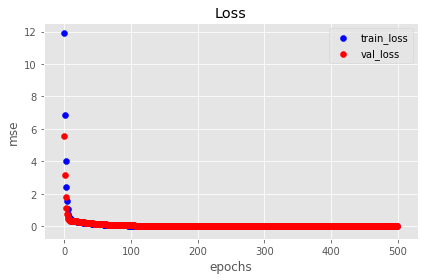

In [7]:
plt.scatter(range(n_epochs), losses, label='train_loss', color='b')
plt.scatter(range(n_epochs), val_losses, label='val_loss', color='r')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()